<a href="https://colab.research.google.com/github/Chaitanya-Shinde/DeepLearning/blob/main/ClassificationModels_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a classification network model using Keras.

---

Using the MNIST dataset for this purpose

In [1]:
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

### importing the MNIST dataset from keras

In [2]:
#importing
from keras.datasets import mnist

#reading the data
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

there are 60000 images inn the dataset, each having the size 28px x 28px

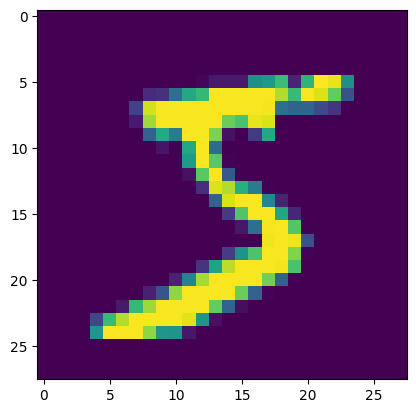

In [5]:
plt.imshow(X_train[0])

### flattening the images
flattening the image into 1 dimentional vectors to work with our neural network

each image will be the size of 1 x (28x 28) = 1 x 784

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [7]:
X_train.shape

(60000, 784)

### normalizing pixel values

from 0-255 to 0-1

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Categorizing target variable into categories

i will use the to_categorical function to divide our target variable into categories

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
y_train[0]

np.uint8(5)

In [12]:
y_train.shape

(60000,)

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [16]:
y_train.shape

(60000, 10)

In [17]:
num_classes = y_test.shape[1]
num_classes

10

### Building the neural network

In [18]:
def classification_model():
  model = Sequential()
  model.add(Input(shape=(num_pixels,)))
  model.add(Dense(num_pixels,activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

### Training and testing the network

In [19]:
model = classification_model()

In [20]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9039 - loss: 0.3154 - val_accuracy: 0.9624 - val_loss: 0.1211
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0786 - val_accuracy: 0.9739 - val_loss: 0.0827
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9847 - loss: 0.0497 - val_accuracy: 0.9757 - val_loss: 0.0740
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9889 - loss: 0.0358 - val_accuracy: 0.9820 - val_loss: 0.0628
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9906 - loss: 0.0292 - val_accuracy: 0.9787 - val_loss: 0.0808
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0235 - val_accuracy: 0.9799 - val_loss: 0.0769
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9937 - loss: 0.0188 - val_accuracy: 0.9833 - val_loss: 0.0703
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9949 - loss: 0.0160 

In [21]:
scores = model.evaluate(X_test,y_test,verbose = 0)

In [22]:
scores

[0.09306458383798599, 0.9801999926567078]

In [23]:
print(f'The accuraccy is: {scores[1]},\nAnd the error is: {1-scores[1]}')

The accuraccy is: 0.9801999926567078,
And the error is: 0.019800007343292236


running the training process using the T4 GPU hardware accelerator makes it run faster

### Practice 1

6 dense layers

In [24]:
def test_classification_model():
  model = Sequential()
  model.add(Input(shape=(num_pixels,)))
  model.add(Dense(num_pixels, activation='relu'))
  model.add(Dense(100,activation='relu'))
  model.add(Dense(100,activation='relu'))
  model.add(Dense(100,activation='relu'))
  model.add(Dense(100,activation='relu'))
  model.add(Dense(100,activation='relu'))
  model.add(Dense(num_classes, activation='relu'))

  model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
  return model

In [25]:
test_model1 = classification_model()

In [26]:
test_model1.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9045 - loss: 0.3142 - val_accuracy: 0.9680 - val_loss: 0.0965
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9757 - loss: 0.0775 - val_accuracy: 0.9780 - val_loss: 0.0734
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9844 - loss: 0.0470 - val_accuracy: 0.9735 - val_loss: 0.0909
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9883 - loss: 0.0371 - val_accuracy: 0.9818 - val_loss: 0.0657
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9917 - loss: 0.0262 - val_accuracy: 0.9816 - val_loss: 0.0668
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0216 - val_accuracy: 0.9803 - val_loss: 0.0769
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0191 - val_accuracy: 0.9796 - val_loss: 0.0738
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9944 - loss: 0.0161 -

In [27]:
test_scores1 = test_model1.evaluate(X_test,y_test,verbose = 0)
test_scores1

[0.09572812914848328, 0.9793000221252441]

In [28]:
print(f'The accuraccy is: {test_scores1[1]},\nAnd the error is: {1-test_scores1[1]}')

The accuraccy is: 0.9793000221252441,
And the error is: 0.02069997787475586


by adding more dense layers, the model has learned the data well and improved its accuracy and decreased its error

### Saving and loading models with keras

In [29]:
#saving the model
test_model1.save('test_classification_model.keras')

In [30]:
#loading the model
pretrained_model = keras.saving.load_model('test_classification_model.keras')

In [31]:
import cv2
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


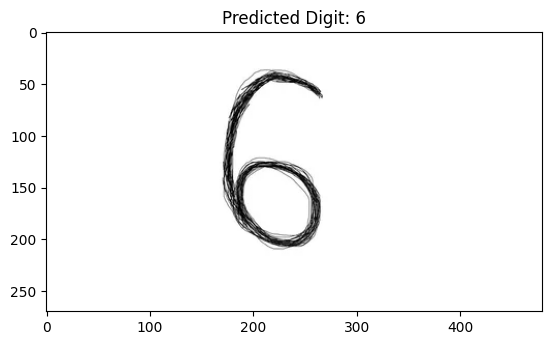

In [38]:
def classify_and_display_digit(image_path):
  # loading and preprocessing the Image
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')  # Displaying the image in grayscale
  img = cv2.resize(img, (28, 28))  # Resizing to match MNIST data
  img = img / 255.0  # Normalizing pixel values
  img = img.reshape(1, 784)  # Reshaping for model input

  #making predictions using the Model
  prediction = model.predict(img)
  predicted_digit = np.argmax(prediction)  # Get the predicted digit

  plt.title(f"Predicted Digit: {predicted_digit}")
  plt.show()

#implementation
image_path = '/content/handwritten_6.jpg'  # Replace with your image path
classify_and_display_digit(image_path)
